# Importing dependencies

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Harsh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Harsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Harsh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# reading and storing the data 

In [2]:
df=pd.read_csv("DATA\Heart.csv")

# EDA

In [3]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:

def missing_data(data):
    """
    objective: check missing value count and percentage in all columns
    data: input data frame
    return: Missing value data frame
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=["total", "percent"])
    return missing_data


In [6]:
missing_data(df)

,total,percent
SkinCancer,0,0.0
KidneyDisease,0,0.0
BMI,0,0.0
Smoking,0,0.0
AlcoholDrinking,0,0.0
Stroke,0,0.0
PhysicalHealth,0,0.0
MentalHealth,0,0.0
DiffWalking,0,0.0
Sex,0,0.0


- there are no missing values in the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [10]:
colname_num=[]
for x in df.columns:
    if df[x].dtype=="object":
        colname_num.append(x)
colname_num

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for x in colname_num:
    df[x]=le.fit_transform(df[x])
    print()
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    print("Feature",x)
    print("mapping",le_name_mapping)


Feature HeartDisease
mapping {'No': 0, 'Yes': 1}

Feature Smoking
mapping {'No': 0, 'Yes': 1}

Feature AlcoholDrinking
mapping {'No': 0, 'Yes': 1}

Feature Stroke
mapping {'No': 0, 'Yes': 1}

Feature DiffWalking
mapping {'No': 0, 'Yes': 1}

Feature Sex
mapping {'Female': 0, 'Male': 1}

Feature AgeCategory
mapping {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}

Feature Race
mapping {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'White': 5}

Feature Diabetic
mapping {'No': 0, 'No, borderline diabetes': 1, 'Yes': 2, 'Yes (during pregnancy)': 3}

Feature PhysicalActivity
mapping {'No': 0, 'Yes': 1}

Feature GenHealth
mapping {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}

Feature Asthma
mapping {'No': 0, 'Yes': 1}

Feature KidneyDisease
mapping {'No': 0, 'Yes': 1}

Feature SkinCancer
mapping {'No': 0, 'Yes': 1}


In [12]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [13]:
df.shape

(319795, 18)

In [14]:
df.drop(["GenHealth", "Race"], axis=1, inplace=True)


In [15]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [16]:
df_undersample=df.copy()

In [17]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Separating features and target variable
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target variable

# Apply RandomUnderSampler to undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # 1.0 means undersample to match the minority class size
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Combine undersampled features and target variable 
undersampled_df = pd.concat([pd.DataFrame(X_undersampled, columns=X.columns), pd.Series(y_undersampled, name='HeartDisease')], axis=1)

# Display the updated class distribution in the undersampled DataFrame
print(undersampled_df['HeartDisease'].value_counts())



1    27373
0    27373
Name: HeartDisease, dtype: int64


In [18]:
df.shape

(319795, 16)

In [19]:
X = pd.DataFrame(X_undersampled, columns=X.columns)
y = pd.Series(y_undersampled, name='HeartDisease')


print(y.value_counts())

1    27373
0    27373
Name: HeartDisease, dtype: int64


In [20]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
111390,25.02,0,0,0,0.0,7.0,0,0,6,0,1,6.0,1,0,1
250162,23.30,0,0,0,0.0,0.0,0,0,6,0,1,7.0,0,0,0
230713,25.77,1,0,0,0.0,0.0,0,1,5,0,1,4.0,1,0,0
153210,25.61,1,1,1,2.0,30.0,0,0,1,2,0,6.0,0,0,0
149117,31.16,1,0,0,0.0,0.0,1,0,9,0,1,7.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,38.45,0,0,1,30.0,15.0,1,0,7,2,1,6.0,1,0,0
319767,36.21,1,0,0,0.0,0.0,1,0,11,2,1,8.0,0,0,0
319781,37.12,1,0,0,0.0,0.0,0,1,3,0,1,7.0,0,0,0
319786,33.20,1,0,0,0.0,0.0,0,0,8,2,1,8.0,1,0,0


In [21]:
y

111390    0
250162    0
230713    0
153210    0
149117    0
         ..
319765    1
319767    1
319781    1
319786    1
319790    1
Name: HeartDisease, Length: 54746, dtype: int32

In [22]:
# Update the original 'df' with the undersampled values
df_undersample= pd.concat([X, y], axis=1)

# Display the updated class distribution in the 'df' DataFrame
print(df_undersample['HeartDisease'].value_counts())


1    27373
0    27373
Name: HeartDisease, dtype: int64


In [23]:
df_undersample.shape

(54746, 16)

In [24]:
X.shape

(54746, 15)

In [25]:
y.shape

(54746,)

In [26]:
df.shape

(319795, 16)

# Data visualization(Undersample)

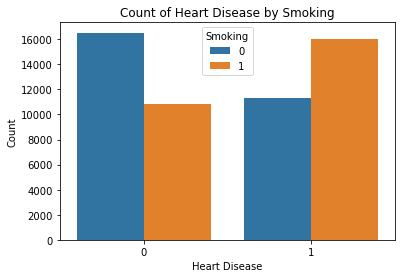

In [27]:
sns.countplot(data=df_undersample, x='HeartDisease', hue='Smoking')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Smoking')
plt.show()

- people who doesn't smoke are more in no heart disease category and vice versa

In [28]:
def create_piechart(data,column):
    """
    objective: create piechart for categorical variables present in the dataset
    params:
         data:this is pandas datarame
         column:this is column name which is use to create plot
      
     return:This will show piechart
    """
    labels=list(data[column].value_counts().to_dict().keys())
    sizes=list(data[column].value_counts().to_dict().values())
    plt.pie(sizes,labels=labels,autopct='%1.2f%%',shadow=False,startangle=45)
    plt.axis('equal')
    plt.title("piechart - {}".format(column))
    plt.show()
    

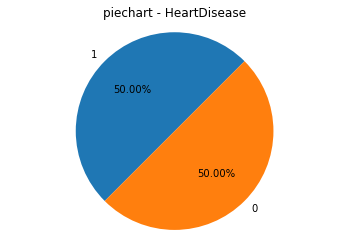

In [29]:
create_piechart(df_undersample,"HeartDisease")

- 50% doesn't suffers from heart disease and 50% suffers from heart disease

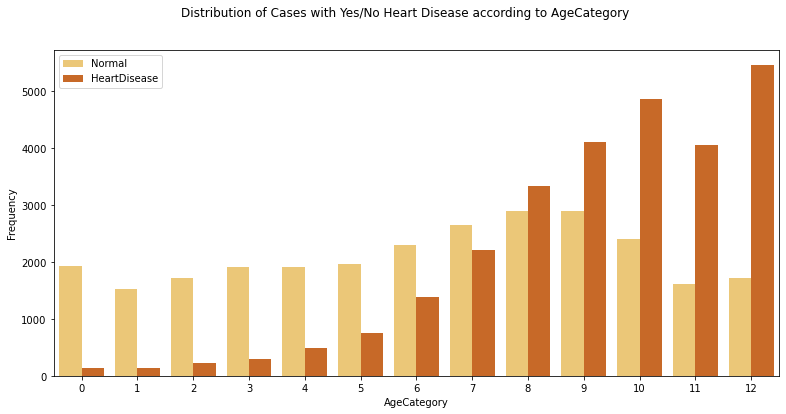

In [30]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df_undersample['AgeCategory'], hue='HeartDisease', data=df_undersample, palette='YlOrBr')
plt.suptitle("Distribution of Cases with Yes/No Heart Disease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal', 'HeartDisease'])
plt.ylabel('Frequency')
plt.show()


- There are more older people with heart disease as in the graph we can claerly see the people with heart diseases are increasing as the age increases  

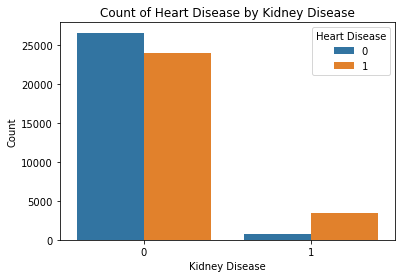

In [31]:
sns.countplot(x='KidneyDisease', hue='HeartDisease', data=df_undersample)
plt.xlabel('Kidney Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Kidney Disease')
plt.legend(title='Heart Disease')
plt.show()


- The count of people with no kidney disease are more in no heart disease category and vice versa 

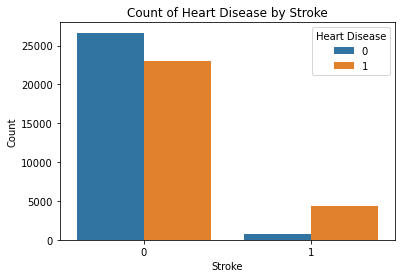

In [32]:
sns.countplot(x='Stroke', hue='HeartDisease', data=df_undersample)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Stroke')
plt.legend(title='Heart Disease')
plt.show()


- Heart disease is found more in the people suffering from stroke and vice versa

In [33]:
df_undersample["MentalHealth"].unique()

array([ 7.,  0., 30., 15.,  5.,  4.,  2., 20.,  3., 10., 25.,  1., 14.,
       16., 27., 28.,  8., 12.,  6., 29., 18.,  9., 11., 21., 13., 17.,
       19., 26., 23., 22., 24.])

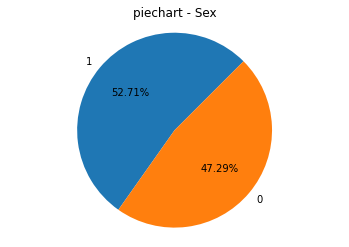

In [34]:
create_piechart(df_undersample,"Sex")

- The number of females are 47.29% and that of males are 52.71%

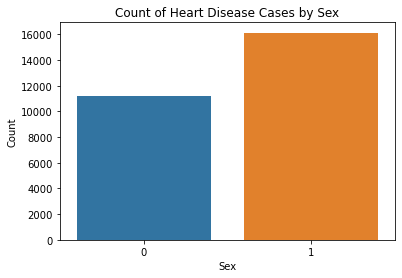

In [35]:

heart_disease_df = df_undersample[df_undersample['HeartDisease'] == 1]

sns.countplot(x='Sex', data=heart_disease_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Sex')
plt.show()


- Males are suffering more from heart disease 

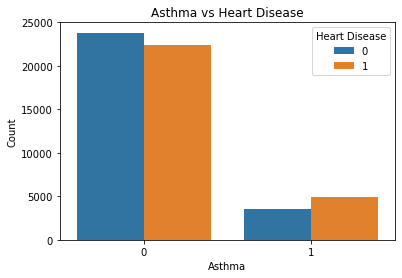

In [36]:
sns.countplot(x='Asthma', hue='HeartDisease', data=df_undersample)
plt.xlabel('Asthma')
plt.ylabel('Count')
plt.title('Asthma vs Heart Disease')
plt.legend(title='Heart Disease')
plt.show()


- Heart disease is found more in the people suffering from Asthma and vice versa

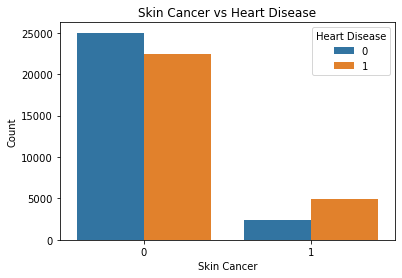

In [37]:
sns.countplot(x='SkinCancer', hue='HeartDisease', data=df_undersample)
plt.xlabel('Skin Cancer')
plt.ylabel('Count')
plt.title('Skin Cancer vs Heart Disease')
plt.legend(title='Heart Disease')
plt.show()


- Heart disease is found more in the people suffering from skin cancer and vice versa

In [38]:
df_undersample.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
111390,25.02,0,0,0,0.0,7.0,0,0,6,0,1,6.0,1,0,1,0
250162,23.30,0,0,0,0.0,0.0,0,0,6,0,1,7.0,0,0,0,0
230713,25.77,1,0,0,0.0,0.0,0,1,5,0,1,4.0,1,0,0,0
153210,25.61,1,1,1,2.0,30.0,0,0,1,2,0,6.0,0,0,0,0
149117,31.16,1,0,0,0.0,0.0,1,0,9,0,1,7.0,0,0,0,0


# Data splitting and scaling

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=10)
print("Train size",X_train.shape,y_train.shape)
print("Test size",X_test.shape,y_test.shape)


Train size (38322, 15) (38322,)
Test size (16424, 15) (16424,)


In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

y=y.astype(int)


In [41]:
X_train_scale


array([[0.2196273 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24298161, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.17654889, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19203775, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23075992, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10769603, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
%%time
classifier=LogisticRegression()
classifier.fit(X_train_scale,y_train)
y_pred=classifier.predict(X_test_scale)
print(list(zip(y_test,y_pred)))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (0, 1), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1),


Wall time: 116 ms


In [44]:
print(list(zip(df.columns,classifier.coef_.ravel())))
print(classifier.intercept_)

[('HeartDisease', 1.1714472844149766), ('BMI', 0.4812324761191896), ('Smoking', -0.27255373524879917), ('AlcoholDrinking', 1.313610693627847), ('Stroke', 0.7363573746605527), ('PhysicalHealth', 0.4438092651439403), ('MentalHealth', 0.4664238291662714), ('DiffWalking', 0.7572819691819047), ('Sex', 3.6701144508530152), ('AgeCategory', 0.8790474627090791), ('Diabetic', -0.11691265185578592), ('PhysicalActivity', -0.7777733787652887), ('SleepTime', 0.3735564299882435), ('Asthma', 0.7058942671490455), ('KidneyDisease', 0.15299861710228366)]
[-3.66266789]


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(y_test,y_pred)

print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[6073 2143]
 [1893 6315]]
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      8216
           1       0.75      0.77      0.76      8208

    accuracy                           0.75     16424
   macro avg       0.75      0.75      0.75     16424
weighted avg       0.75      0.75      0.75     16424

Accuracy of the model:  0.7542620555284949


# Decision tree

In [47]:
from sklearn import tree

In [48]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy',
                                  random_state=20, 
                                  min_samples_leaf=10, 
                                  max_depth=20,
                                  min_samples_split=20 )

#fit the model on the data and predict the values

model_dt.fit(X_train_scale, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=20, random_state=20)

In [49]:
dt_pred = model_dt.predict(X_test_scale)
dt_pred

array([1, 1, 0, ..., 0, 1, 1])

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(y_test, dt_pred))
print(accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[5941 2275]
 [2353 5855]]
0.7182172430589382
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      8216
           1       0.72      0.71      0.72      8208

    accuracy                           0.72     16424
   macro avg       0.72      0.72      0.72     16424
weighted avg       0.72      0.72      0.72     16424



# random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [52]:
rfc.fit(X_train_scale, y_train)

RandomForestClassifier(random_state=42)

In [53]:
rfc_pred = rfc.predict(X_test_scale)
rfc_pred

array([1, 0, 0, ..., 1, 1, 1])

In [54]:
print(classification_report(y_test, rfc_pred))
print("Accuracy: ", accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      8216
           1       0.71      0.75      0.73      8208

    accuracy                           0.72     16424
   macro avg       0.72      0.72      0.72     16424
weighted avg       0.72      0.72      0.72     16424

Accuracy:  0.7240014612761811


# gradient boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_scale, y_train)
y_pred = gbm.predict(X_test_scale)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7590720896249391


# naive bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

# Training the model
naive_bayes.fit(X_train_scale, y_train)

# Making predictions on the test set
y_pred = naive_bayes.predict(X_test_scale)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7028129566488066


# catboosting

In [57]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_seed=42, iterations=100, learning_rate=0.1)

# Training the model
catboost.fit(X_train_scale, y_train)

# Making predictions on the test set
y_pred = catboost.predict(X_test_scale)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


0:	learn: 0.6664405	total: 154ms	remaining: 15.2s
1:	learn: 0.6442403	total: 159ms	remaining: 7.8s
2:	learn: 0.6257967	total: 164ms	remaining: 5.31s
3:	learn: 0.6100939	total: 169ms	remaining: 4.06s
4:	learn: 0.5972186	total: 174ms	remaining: 3.3s
5:	learn: 0.5858100	total: 178ms	remaining: 2.79s
6:	learn: 0.5758801	total: 183ms	remaining: 2.43s
7:	learn: 0.5670367	total: 188ms	remaining: 2.16s
8:	learn: 0.5604855	total: 193ms	remaining: 1.95s
9:	learn: 0.5539392	total: 198ms	remaining: 1.78s
10:	learn: 0.5481618	total: 203ms	remaining: 1.64s
11:	learn: 0.5427985	total: 208ms	remaining: 1.52s
12:	learn: 0.5384158	total: 213ms	remaining: 1.42s
13:	learn: 0.5349208	total: 217ms	remaining: 1.33s
14:	learn: 0.5315231	total: 222ms	remaining: 1.26s
15:	learn: 0.5287607	total: 228ms	remaining: 1.2s
16:	learn: 0.5262766	total: 233ms	remaining: 1.14s
17:	learn: 0.5238149	total: 238ms	remaining: 1.08s
18:	learn: 0.5214569	total: 243ms	remaining: 1.03s
19:	learn: 0.5196925	total: 248ms	remaining:

# adaboost classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1.0)

# Training the model
adaboost.fit(X_train_scale, y_train)

# Making predictions on the test set
y_pred = adaboost.predict(X_test_scale)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7535314174378958


# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean',n_jobs=-1)
model.fit(X_train_scale,y_train)
y_pred_train=model.predict(X_test_scale)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(y_test,y_pred_train)

print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred_train))

acc=accuracy_score(y_test, y_pred_train)
print("Accuracy of the model: ",acc)

[[5823 2393]
 [2192 6016]]
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      8216
           1       0.72      0.73      0.72      8208

    accuracy                           0.72     16424
   macro avg       0.72      0.72      0.72     16424
weighted avg       0.72      0.72      0.72     16424

Accuracy of the model:  0.720835362883585


# comparing accuracies of all the model(UNDERSAMPLING)

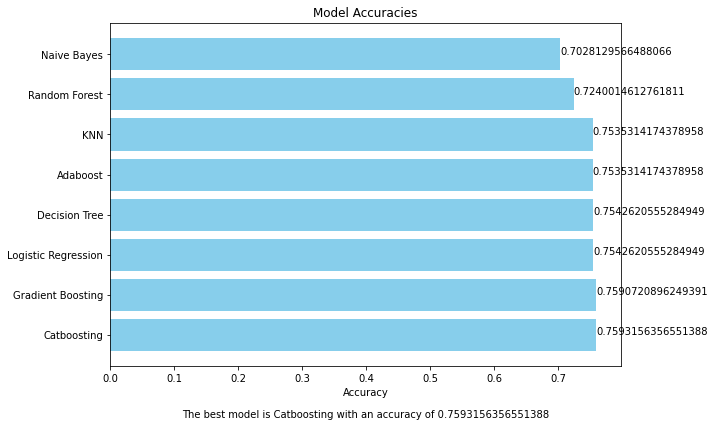

In [61]:
# Dictionary of model names and accuracies
model_accuracies = {
    "Logistic Regression": 0.7542620555284949,
    "Decision Tree": 0.7542620555284949,
    "Random Forest": 0.7240014612761811,
    "Gradient Boosting": 0.7590720896249391,
    "Naive Bayes": 0.7028129566488066,
    "Catboosting": 0.7593156356551388,
    "Adaboost":  0.7535314174378958,
    "KNN": 0.7535314174378958
}

# Sorting models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
models, accuracies = zip(*sorted_models)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the values on the plot
for index, value in enumerate(accuracies):
    plt.text(value, index, str(value))

# Find the best model and its accuracy
best_model = sorted_models[0][0]
best_accuracy = sorted_models[0][1]

# Adding the best model and accuracy to the plot
plt.text(0.5, -0.15, f"The best model is {best_model} with an accuracy of {best_accuracy}", ha='center', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


# oversampling

In [62]:
from imblearn.over_sampling import RandomOverSampler

# Separating features and target variable
A = df.drop('HeartDisease', axis=1)  # Features
b = df['HeartDisease']  # Target variable

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)  
# 'minority' means it will resample the minority class to match the majority class
A_oversampled, b_oversampled = oversampler.fit_resample(A, b)

oversampled_df = pd.concat([pd.DataFrame(A_oversampled, columns=A.columns), pd.Series(b_oversampled, name='HeartDisease')], axis=1)

print(oversampled_df['HeartDisease'].value_counts())


1    292422
0    292422
Name: HeartDisease, dtype: int64


In [63]:
A = pd.DataFrame(A_oversampled, columns=X.columns)
b = pd.Series(b_oversampled, name='HeartDisease')
print(y.value_counts())

1    27373
0    27373
Name: HeartDisease, dtype: int64


In [64]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,2,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,2,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,2,0,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,0,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,0,1,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,0,0,12.0,0,0,0


In [65]:
df_oversample=df.copy()

In [66]:
df_oversample = pd.concat([A, b], axis=1)

print(df_oversample['HeartDisease'].value_counts())


1    292422
0    292422
Name: HeartDisease, dtype: int64


# Data Visualization(OVERSAMPLE)

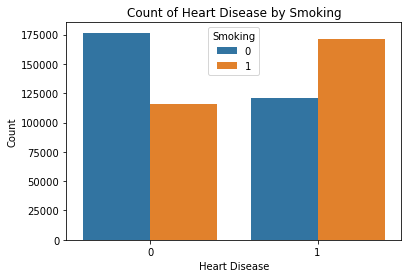

In [67]:
sns.countplot(data=df_oversample, x='HeartDisease', hue='Smoking')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Smoking')
plt.show()


- Heart disease is found more in the people who smokes and vice versa

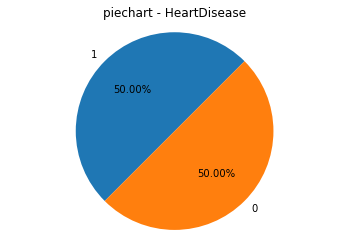

In [68]:
create_piechart(df_oversample,"HeartDisease")

- 50% doesn't suffers from heart disease and 50% suffers from heart disease

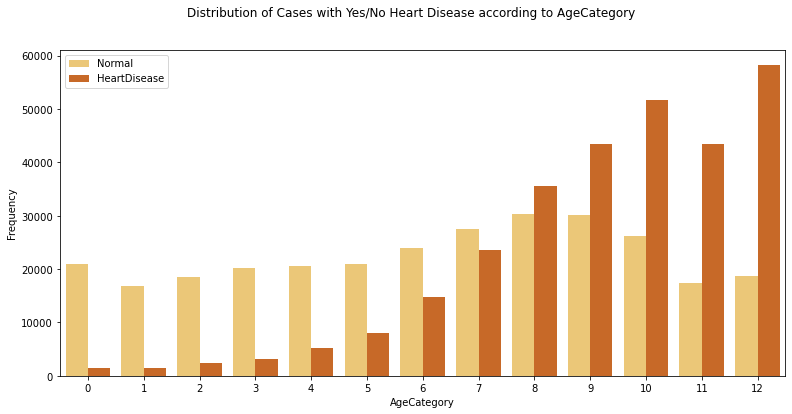

In [69]:

plt.figure(figsize=(13, 6))
sns.countplot(x=df_oversample['AgeCategory'], hue='HeartDisease', data=df_oversample, palette='YlOrBr')
plt.suptitle("Distribution of Cases with Yes/No Heart Disease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal', 'HeartDisease'])
plt.ylabel('Frequency')
plt.show()

- Heart disease is found more with increasing age 

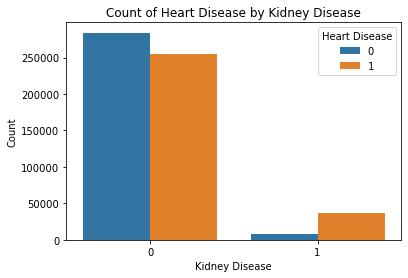

In [70]:
sns.countplot(x='KidneyDisease', hue='HeartDisease', data=df_oversample)
plt.xlabel('Kidney Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Kidney Disease')
plt.legend(title='Heart Disease')
plt.show()

- Heart disease is found more in the people suffering from Kideny Disease and vice versa

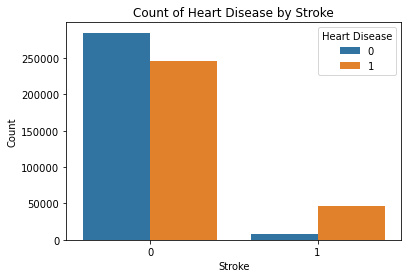

In [71]:
sns.countplot(x='Stroke', hue='HeartDisease', data=df_oversample)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Stroke')
plt.legend(title='Heart Disease')
plt.show()

- Heart disease is found more in the people suffering from stroke and vice versa

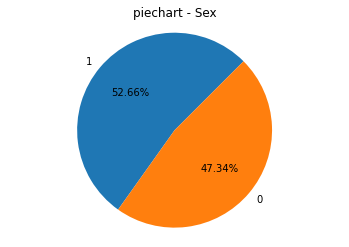

In [72]:
create_piechart(df_oversample,"Sex")

- the number of females are 47.34 % and that of males are 52.66 %

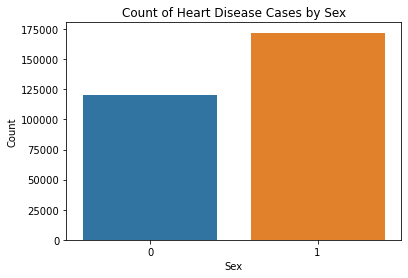

In [73]:
heart_disease_df = df_oversample[df_oversample['HeartDisease'] == 1]

sns.countplot(x='Sex', data=heart_disease_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Sex')
plt.show()


- males are suffering more from heart disease than females

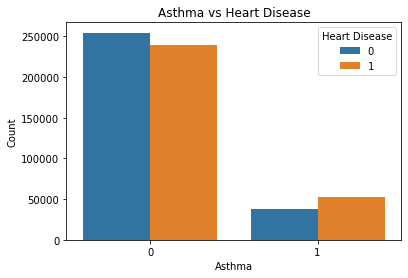

In [74]:
sns.countplot(x='Asthma', hue='HeartDisease', data=df_oversample)
plt.xlabel('Asthma')
plt.ylabel('Count')
plt.title('Asthma vs Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

Heart disease is found more in the people suffering from Asthma and vice versa

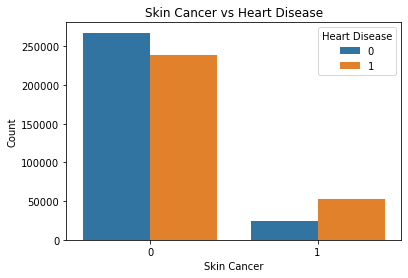

In [75]:
sns.countplot(x='SkinCancer', hue='HeartDisease', data=df_oversample)
plt.xlabel('Skin Cancer')
plt.ylabel('Count')
plt.title('Skin Cancer vs Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

- Heart disease is found more in the people suffering from skin cancer and vice versa

# Splitting and scaling the data 

In [76]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test= train_test_split(A,b,test_size=0.3,random_state=10)
print("Train size",A_train.shape,b_train.shape)
print("Test size",A_test.shape,b_test.shape)


Train size (409390, 15) (409390,)
Test size (175454, 15) (175454,)


In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

A_train_scale=scaler.transform(A_train)
A_test_scale=scaler.transform(A_test)

b=b.astype(int)


In [78]:
A_train_scale

array([[0.2018393 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38806873, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2088577 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11181026, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27650048, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07514521, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
%%time
classifier=LogisticRegression()
classifier.fit(A_train_scale,b_train)
b_pred=classifier.predict(A_test_scale)
print(list(zip(b_test,y_pred)))

[(0, 0), (1, 0), (1, 0), (0, 1), (0, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 0), (1, 1), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 1), (1, 1), (0, 0), (0, 1), (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (1, 0), (1, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 1), (0, 1), (1, 0), (1, 0), (0, 0), (0, 1), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0),

In [81]:
print(list(zip(df.columns,classifier.coef_.ravel())))
print(classifier.intercept_)

[('HeartDisease', 1.389577313744434), ('BMI', 0.4754782529092301), ('Smoking', -0.23258254593946384), ('AlcoholDrinking', 1.3288203219889863), ('Stroke', 0.7360044695364971), ('PhysicalHealth', 0.4095141855121811), ('MentalHealth', 0.4570243585582242), ('DiffWalking', 0.7509170419757913), ('Sex', 3.6667458909797084), ('AgeCategory', 0.9289021238083073), ('Diabetic', -0.09083866358909516), ('PhysicalActivity', -0.8030358100030974), ('SleepTime', 0.3799922560776663), ('Asthma', 0.7545137248600263), ('KidneyDisease', 0.1319441121255009)]
[-3.71501392]


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(b_test,b_pred)

print(cfm)

print("Classification report: ")

print(classification_report(b_test,b_pred))

acc=accuracy_score(b_test, b_pred)
print("Accuracy of the model: ",acc)

[[64757 22922]
 [20843 66932]]
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     87679
           1       0.74      0.76      0.75     87775

    accuracy                           0.75    175454
   macro avg       0.75      0.75      0.75    175454
weighted avg       0.75      0.75      0.75    175454

Accuracy of the model:  0.7505614007090178


# decision tree

In [83]:
from sklearn import tree

In [84]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy',
                                  random_state=20, 
                                  min_samples_leaf=10, 
                                  max_depth=20,
                                  min_samples_split=20 )

#fit the model on the data and predict the values

model_dt.fit(A_train_scale, b_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=20, random_state=20)

In [85]:
dt_pred = model_dt.predict(A_test_scale)
dt_pred

array([1, 1, 1, ..., 0, 1, 1])

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(b_test, dt_pred))
print(accuracy_score(b_test,dt_pred))
print(classification_report(b_test,dt_pred))

[[68064 19615]
 [14210 73565]]
0.8072144265733469
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     87679
           1       0.79      0.84      0.81     87775

    accuracy                           0.81    175454
   macro avg       0.81      0.81      0.81    175454
weighted avg       0.81      0.81      0.81    175454



# Random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [88]:
rfc.fit(A_train_scale, b_train)

RandomForestClassifier(random_state=42)

In [89]:
rfc_pred = rfc.predict(A_test_scale)
rfc_pred

array([0, 1, 1, ..., 0, 1, 1])

In [90]:
print(classification_report(b_test, rfc_pred))
print("Accuracy: ", accuracy_score(b_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     87679
           1       0.91      1.00      0.95     87775

    accuracy                           0.95    175454
   macro avg       0.96      0.95      0.95    175454
weighted avg       0.96      0.95      0.95    175454

Accuracy:  0.9515542535365394


# Gradient boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(A_train_scale, b_train)
b_pred = gbm.predict(A_test_scale)
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7544655579240143


# Naive bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

# Training the model
naive_bayes.fit(A_train_scale, b_train)

# Making predictions on the test set
b_pred = naive_bayes.predict(A_test_scale)

# Calculating accuracy
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6988042449872901


# catboost

In [93]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_seed=42, iterations=100, learning_rate=0.1)

# Training the model
catboost.fit(A_train_scale, b_train)

# Making predictions on the test set
b_pred = catboost.predict(A_test_scale)

# Calculating accuracy
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)


0:	learn: 0.6654114	total: 25.2ms	remaining: 2.49s
1:	learn: 0.6428264	total: 47ms	remaining: 2.31s
2:	learn: 0.6237587	total: 70.7ms	remaining: 2.28s
3:	learn: 0.6080536	total: 91.7ms	remaining: 2.2s
4:	learn: 0.5946524	total: 116ms	remaining: 2.2s
5:	learn: 0.5830094	total: 138ms	remaining: 2.16s
6:	learn: 0.5730734	total: 160ms	remaining: 2.12s
7:	learn: 0.5644229	total: 180ms	remaining: 2.07s
8:	learn: 0.5570485	total: 200ms	remaining: 2.03s
9:	learn: 0.5508108	total: 222ms	remaining: 2s
10:	learn: 0.5450194	total: 244ms	remaining: 1.97s
11:	learn: 0.5401517	total: 263ms	remaining: 1.93s
12:	learn: 0.5359115	total: 285ms	remaining: 1.91s
13:	learn: 0.5320735	total: 305ms	remaining: 1.87s
14:	learn: 0.5286951	total: 323ms	remaining: 1.83s
15:	learn: 0.5260629	total: 341ms	remaining: 1.79s
16:	learn: 0.5234773	total: 360ms	remaining: 1.75s
17:	learn: 0.5211946	total: 380ms	remaining: 1.73s
18:	learn: 0.5191001	total: 401ms	remaining: 1.71s
19:	learn: 0.5173977	total: 420ms	remaining:

# Adaboost

In [94]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1.0)

# Training the model
adaboost.fit(A_train_scale, b_train)

# Making predictions on the test set
b_pred = adaboost.predict(A_test_scale)

# Calculating accuracy
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7515531136366227


# KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean',n_jobs=-1)
model.fit(A_train_scale,b_train)
b_pred_train=model.predict(A_test_scale)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(b_test,b_pred_train)

print(cfm)

print("Classification report: ")

print(classification_report(b_test,b_pred_train))

acc=accuracy_score(b_test, b_pred_train)
print("Accuracy of the model: ",acc)

[[67925 19754]
 [ 1139 86636]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.77      0.87     87679
           1       0.81      0.99      0.89     87775

    accuracy                           0.88    175454
   macro avg       0.90      0.88      0.88    175454
weighted avg       0.90      0.88      0.88    175454

Accuracy of the model:  0.8809203551928141


# comparing and evaluating the best model (OVER SAMPLING)

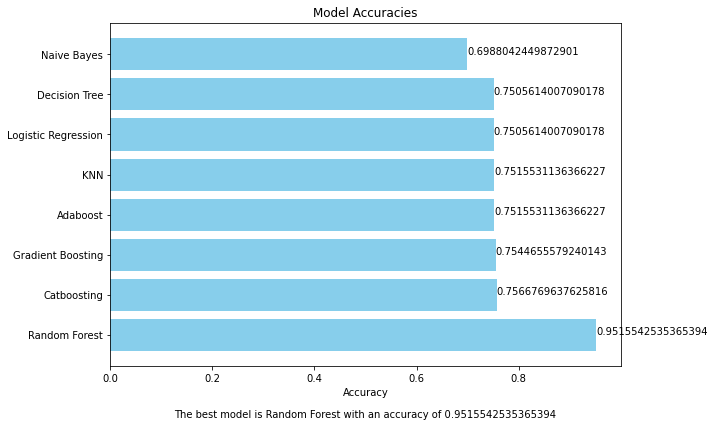

In [97]:
import matplotlib.pyplot as plt


model_accuracies = {
    "Logistic Regression": 0.7505614007090178,
    "Decision Tree": 0.7505614007090178,
    "Random Forest":  0.9515542535365394,
    "Gradient Boosting": 0.7544655579240143,
    "Naive Bayes": 0.6988042449872901,
    "Catboosting": 0.7566769637625816,
    "Adaboost": 0.7515531136366227,
    "KNN": 0.7515531136366227
}

# Sorting models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
models, accuracies = zip(*sorted_models)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the values on the plot
for index, value in enumerate(accuracies):
    plt.text(value, index, str(value))

# Find the best model and its accuracy
best_model = sorted_models[0][0]
best_accuracy = sorted_models[0][1]

# Adding the best model and accuracy to the plot
plt.text(0.5, -0.15, f"The best model is {best_model} with an accuracy of {best_accuracy}", ha='center', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


# without resampling

In [98]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,2,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,2,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,8.0,0,0,0


In [99]:
df.shape

(319795, 16)

In [100]:
A = df.drop('HeartDisease', axis=1)  # Features
b = df['HeartDisease']  # Target variable

# data visualization(NO RESAMPLE)

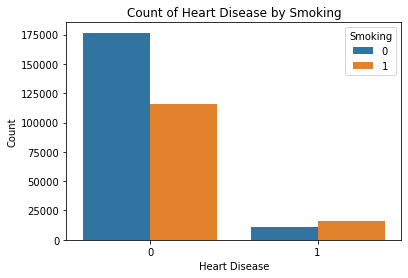

In [101]:
sns.countplot(data=df, x='HeartDisease', hue='Smoking')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Smoking')
plt.show()


- Heart disease is found more in the people who smokes more and vice versa

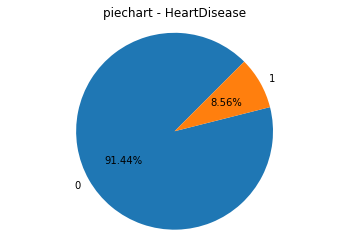

In [102]:
create_piechart(df,"HeartDisease")

- 91.44% doesn't suffers from heart disease and 8.56% suffers from heart disease

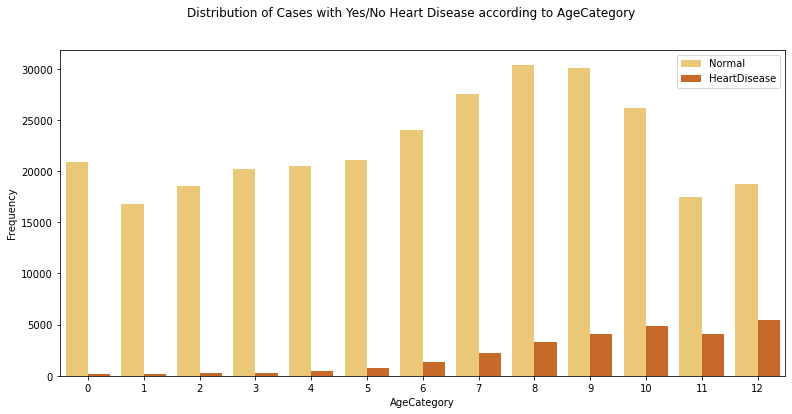

In [103]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df['AgeCategory'], hue='HeartDisease', data=df, palette='YlOrBr')
plt.suptitle("Distribution of Cases with Yes/No Heart Disease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal', 'HeartDisease'])
plt.ylabel('Frequency')
plt.show()

- Heart disease is more found with the increasing age

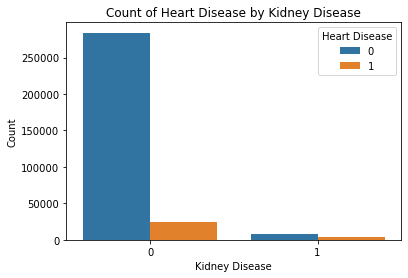

In [104]:
sns.countplot(x='KidneyDisease', hue='HeartDisease', data=df)
plt.xlabel('Kidney Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Kidney Disease')
plt.legend(title='Heart Disease')
plt.show()

- Here as the data is imbalance so population of no heart disease category dominates 
- So here heart disease is found in both people suffering from kidney disease and not suffering from kidney disease and vice versa

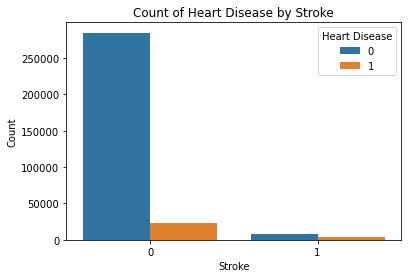

In [105]:
sns.countplot(x='Stroke', hue='HeartDisease', data=df)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Stroke')
plt.legend(title='Heart Disease')
plt.show()

- Here as the data is imbalance so population of no heart disease category dominates
- So here heart disease is found in both people suffering from stroke and not suffering from stroke and vice versa

In [106]:
df["MentalHealth"].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

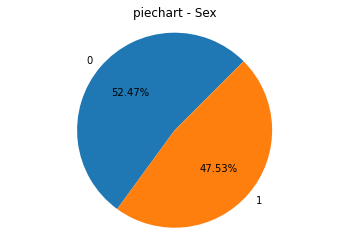

In [107]:
create_piechart(df,"Sex")

- the number of females are 47.53 % and that of males are 52.47 %

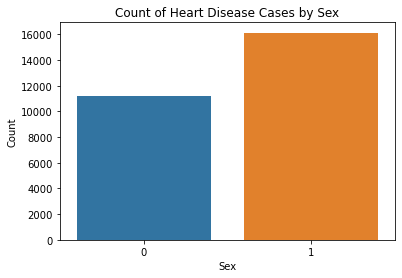

In [108]:
heart_disease_df = df[df['HeartDisease'] == 1]

sns.countplot(x='Sex', data=heart_disease_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Sex')
plt.show()

- Males suffer more from heart disease than women

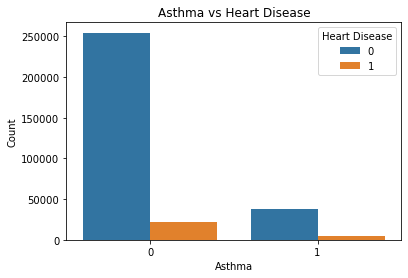

In [109]:
sns.countplot(x='Asthma', hue='HeartDisease', data=df)
plt.xlabel('Asthma')
plt.ylabel('Count')
plt.title('Asthma vs Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

- Here as the data is imbalance so population of no heart disease category dominates
- So here heart disease is found in both people suffering from Asthma and not suffering from Asthma and vice versa

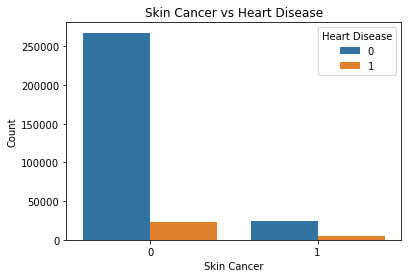

In [110]:
sns.countplot(x='SkinCancer', hue='HeartDisease', data=df)
plt.xlabel('Skin Cancer')
plt.ylabel('Count')
plt.title('Skin Cancer vs Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

- Here as the data is imbalance so population of no heart disease category dominates
- So here heart disease is found in both people suffering from skin cancer and not suffering from skin cancer and vice versa

# data splitting and scaling

In [111]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test= train_test_split(A,b,test_size=0.3,random_state=10)
print("Train size",A_train.shape,b_train.shape)
print("Test size",A_test.shape,b_test.shape)

Train size (223856, 15) (223856,)
Test size (95939, 15) (95939,)


In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

A_train_scale=scaler.transform(A_train)
A_test_scale=scaler.transform(A_test)

b=b.astype(int)


In [113]:
A_train_scale


array([[0.089303  , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.24310261, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2089787 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11181026, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31147144, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.16444821, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Logistic regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
%%time
classifier=LogisticRegression()
classifier.fit(A_train_scale,b_train)
b_pred=classifier.predict(A_test_scale)
print(list(zip(b_test,y_pred)))


[(0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (1, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0),

In [116]:
print(list(zip(df.columns,classifier.coef_.ravel())))
print(classifier.intercept_)


[('HeartDisease', 1.2434995396468158), ('BMI', 0.44995173727950244), ('Smoking', -0.2772483696276864), ('AlcoholDrinking', 1.170293010519817), ('Stroke', 0.6442624467345953), ('PhysicalHealth', 0.3206705388272824), ('MentalHealth', 0.3995959436500034), ('DiffWalking', 0.7192510946446676), ('Sex', 3.393652487312068), ('AgeCategory', 0.8742692718931087), ('Diabetic', -0.09782853031587241), ('PhysicalActivity', -0.7707662156879616), ('SleepTime', 0.35943567993752296), ('Asthma', 0.7038902589408432), ('KidneyDisease', 0.11812802831350522)]
[-5.76255497]


In [117]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(b_test,b_pred)

print(cfm)

print("Classification report: ")

print(classification_report(b_test,b_pred))

acc=accuracy_score(b_test, b_pred)
print("Accuracy of the model: ",acc)

[[87027   700]
 [ 7472   740]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87727
           1       0.51      0.09      0.15      8212

    accuracy                           0.91     95939
   macro avg       0.72      0.54      0.55     95939
weighted avg       0.89      0.91      0.89     95939

Accuracy of the model:  0.9148208757648089


# Decision tree

In [118]:
from sklearn import tree

In [119]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy',
                                  random_state=20, 
                                  min_samples_leaf=10, 
                                  max_depth=20,
                                  min_samples_split=20 )


In [120]:
#fit the model on the data and predict the values

model_dt.fit(A_train_scale, b_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=20, random_state=20)

In [122]:
dt_pred =model_dt.predict(A_test_scale)
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(b_test, dt_pred))
print(accuracy_score(b_test,dt_pred))
print(classification_report(b_test,dt_pred))

[[85905  1822]
 [ 7174  1038]]
0.9062320849706584
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87727
           1       0.36      0.13      0.19      8212

    accuracy                           0.91     95939
   macro avg       0.64      0.55      0.57     95939
weighted avg       0.87      0.91      0.88     95939



# RandomForest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(A_train_scale, b_train)


rfc_pred = rfc.predict(A_test_scale)
rfc_pred


print(classification_report(b_test, rfc_pred))
print("Accuracy: ", accuracy_score(b_test, rfc_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     87727
           1       0.31      0.12      0.17      8212

    accuracy                           0.90     95939
   macro avg       0.61      0.55      0.56     95939
weighted avg       0.87      0.90      0.88     95939

Accuracy:  0.9014999114020367


# GradientBoosting

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(A_train_scale, b_train)
b_pred = gbm.predict(A_test_scale)
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9156443156589082


# naive bayes

In [126]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

# Training the model
naive_bayes.fit(A_train_scale, b_train)

# Making predictions on the test set
b_pred = naive_bayes.predict(A_test_scale)

# Calculating accuracy
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8464545179749633


# CatBoost

In [127]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_seed=42, iterations=100, learning_rate=0.1)

# Training the model
catboost.fit(A_train_scale, b_train)

# Making predictions on the test set
b_pred = catboost.predict(A_test_scale)

# Calculating accuracy
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)

0:	learn: 0.6245791	total: 17.8ms	remaining: 1.76s
1:	learn: 0.5686327	total: 31.7ms	remaining: 1.55s
2:	learn: 0.5224091	total: 45.6ms	remaining: 1.48s
3:	learn: 0.4834585	total: 60.9ms	remaining: 1.46s
4:	learn: 0.4501570	total: 78.2ms	remaining: 1.49s
5:	learn: 0.4219390	total: 94.5ms	remaining: 1.48s
6:	learn: 0.3976642	total: 110ms	remaining: 1.46s
7:	learn: 0.3768973	total: 124ms	remaining: 1.43s
8:	learn: 0.3584834	total: 149ms	remaining: 1.51s
9:	learn: 0.3429501	total: 165ms	remaining: 1.48s
10:	learn: 0.3295700	total: 178ms	remaining: 1.44s
11:	learn: 0.3177281	total: 191ms	remaining: 1.4s
12:	learn: 0.3073259	total: 203ms	remaining: 1.36s
13:	learn: 0.2981596	total: 217ms	remaining: 1.33s
14:	learn: 0.2900848	total: 231ms	remaining: 1.31s
15:	learn: 0.2831234	total: 243ms	remaining: 1.27s
16:	learn: 0.2771630	total: 257ms	remaining: 1.25s
17:	learn: 0.2717905	total: 269ms	remaining: 1.23s
18:	learn: 0.2671699	total: 282ms	remaining: 1.2s
19:	learn: 0.2630196	total: 295ms	rem

# AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1.0)

# Training the model
adaboost.fit(A_train_scale, b_train)

# Making predictions on the test set
b_pred = adaboost.predict(A_test_scale)

# Calculating accuracy
accuracy = accuracy_score(b_test, b_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9147374894464191


# KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean',n_jobs=-1)
model.fit(A_train_scale,b_train)
b_pred_train=model.predict(A_test_scale)

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm =confusion_matrix(b_test,b_pred_train)

print(cfm)

print("Classification report: ")

print(classification_report(b_test,b_pred_train))

acc=accuracy_score(b_test, b_pred_train)
print("Accuracy of the model: ",acc)

[[85828  1899]
 [ 7209  1003]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87727
           1       0.35      0.12      0.18      8212

    accuracy                           0.91     95939
   macro avg       0.63      0.55      0.57     95939
weighted avg       0.87      0.91      0.88     95939

Accuracy of the model:  0.9050646765132011


# comparing and evaluating the best model(NO RESAMPLING)

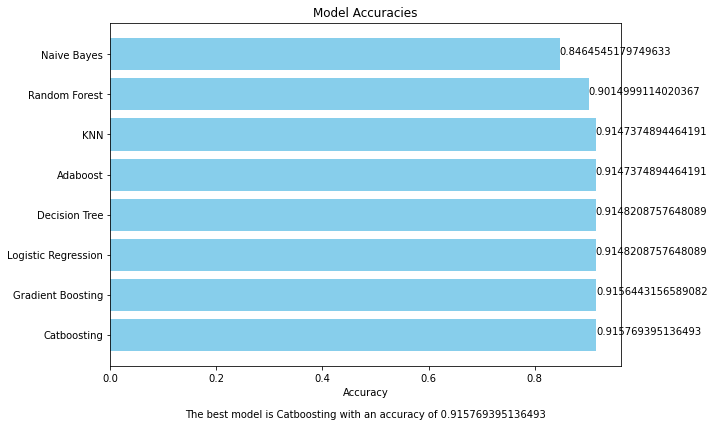

In [131]:
import matplotlib.pyplot as plt

# Dictionary of model names and accuracies
model_accuracies = {
    "Logistic Regression": 0.9148208757648089,
    "Decision Tree": 0.9148208757648089,
    "Random Forest": 0.9014999114020367,
    "Gradient Boosting": 0.9156443156589082,
    "Naive Bayes": 0.8464545179749633,
    "Catboosting": 0.915769395136493,
    "Adaboost": 0.9147374894464191,
    "KNN": 0.9147374894464191
}

# Sorting models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
models, accuracies = zip(*sorted_models)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the values on the plot
for index, value in enumerate(accuracies):
    plt.text(value, index, str(value))

# Find the best model and its accuracy
best_model = sorted_models[0][0]
best_accuracy = sorted_models[0][1]

# Adding the best model and accuracy to the plot
plt.text(0.5, -0.15, f"The best model is {best_model} with an accuracy of {best_accuracy}", ha='center', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()
